<a href="https://colab.research.google.com/github/Adeyinka-hub/MY-MACHINE-LEARNING-AND-DEEP-LEARNING-WORKS-ON-KAGGLE-AND-ZINDI-RESPECTIVELY/blob/master/KAGGLE%20HOUSE%20SALEPRICE%20with%20ElasticNetCV%2C%20LassoCV%2C%20RidgeCV%20(achieved%20RMSE%20Score%3A0.071%20on%20LB).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import matplotlib.gridspec as gridspec
from datetime import datetime
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import matplotlib.style as style
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings('ignore')


In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
previous_train = pd.read_csv("train.csv")

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


## Checking for Missing Values

In [ ]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    ## the two following line may seem complicated but its actually very simple. 
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

missing_percentage(train)


,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageCond,81,5.55
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


## Missing Test values

In [ ]:
missing_percentage(test)

,Total,Percent
PoolQC,1456,99.79
MiscFeature,1408,96.50
Alley,1352,92.67
Fence,1169,80.12
FireplaceQu,730,50.03
LotFrontage,227,15.56
GarageCond,78,5.35
GarageQual,78,5.35
GarageYrBlt,78,5.35
GarageFinish,78,5.35


## Observation:

•	There are multiple types of features.

•	Some features have missing values.

•	Most of the features are object( includes string values in the         variable).

**Similarly, I will normalize the distrbution of the SalePrice by log next.**


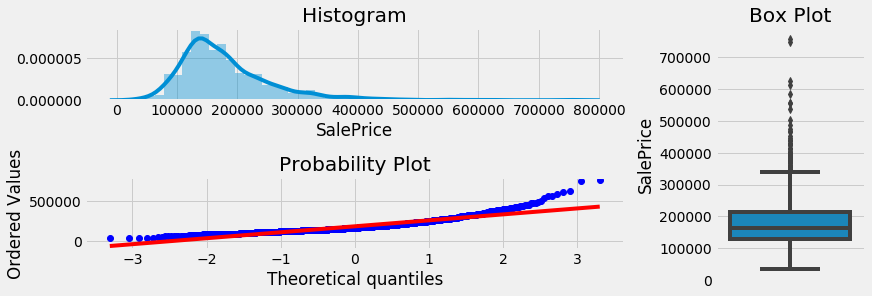

In [ ]:
def plotting_3_chart(df, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    import seaborn as sns
    import matplotlib.gridspec as gridspec
    import matplotlib.pyplot as plt
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,4))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );
    
plotting_3_chart(train, 'SalePrice')

##These three charts above can tell us a lot about our target            variable.

•	Our target variable, SalePrice is not normally distributed.

•	Our target variable is right-skewed.

•	There are multiple outliers in the variable.


In [ ]:
#skewness and kurtosis
print("Skewness: " + str(train['SalePrice'].skew()))
print("Kurtosis: " + str(train['SalePrice'].kurt()))

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


In [ ]:
## trainsforming target variable using numpy.log1p, 
train["SalePrice"] = np.log1p(train["SalePrice"])

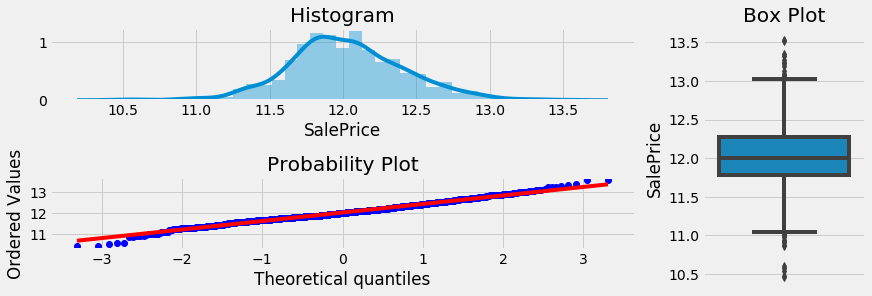

In [ ]:
## Plotting the newly transformed response variable
plotting_3_chart(train, 'SalePrice')


## Note: As you can see the log transformation removes the normality of errors. This solves some of the other assumptions that we talked about above like Homoscedasticity. Let's make a comparison of the pre-transformed and post-transformed state of residual plots.

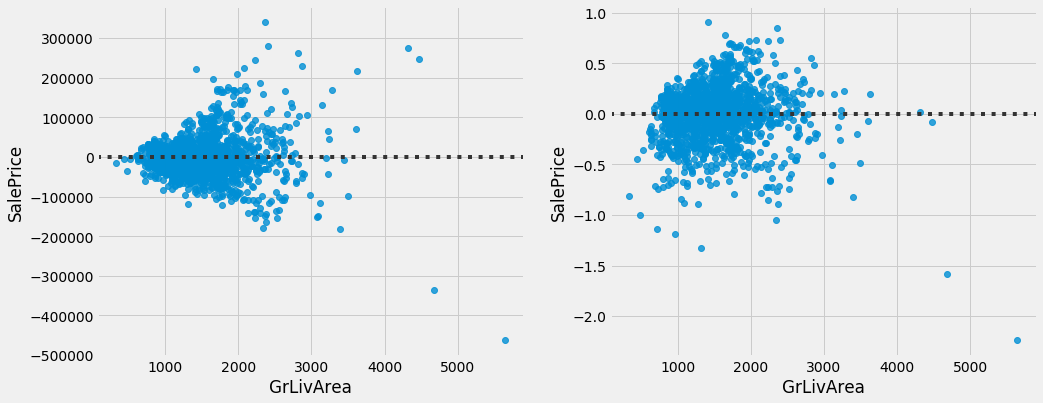

In [ ]:
## Customizing grid for two plots. 
fig, (ax1, ax2) = plt.subplots(figsize = (15,6), ncols=2, sharey = False, sharex=False)
## doing the first scatter plot. 
sns.residplot(x = previous_train.GrLivArea, y = previous_train.SalePrice, ax = ax1)
## doing the scatter plot for GrLivArea and SalePrice. 
sns.residplot(x = train.GrLivArea, y = train.SalePrice, ax = ax2);


## Here, we can see that the pre-transformed chart on the left has heteroscedasticity, and the post-transformed chart on the right has almost an equal amount of variance across the zero lines.


(<Figure size 2160x1440 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe5f807d198>)

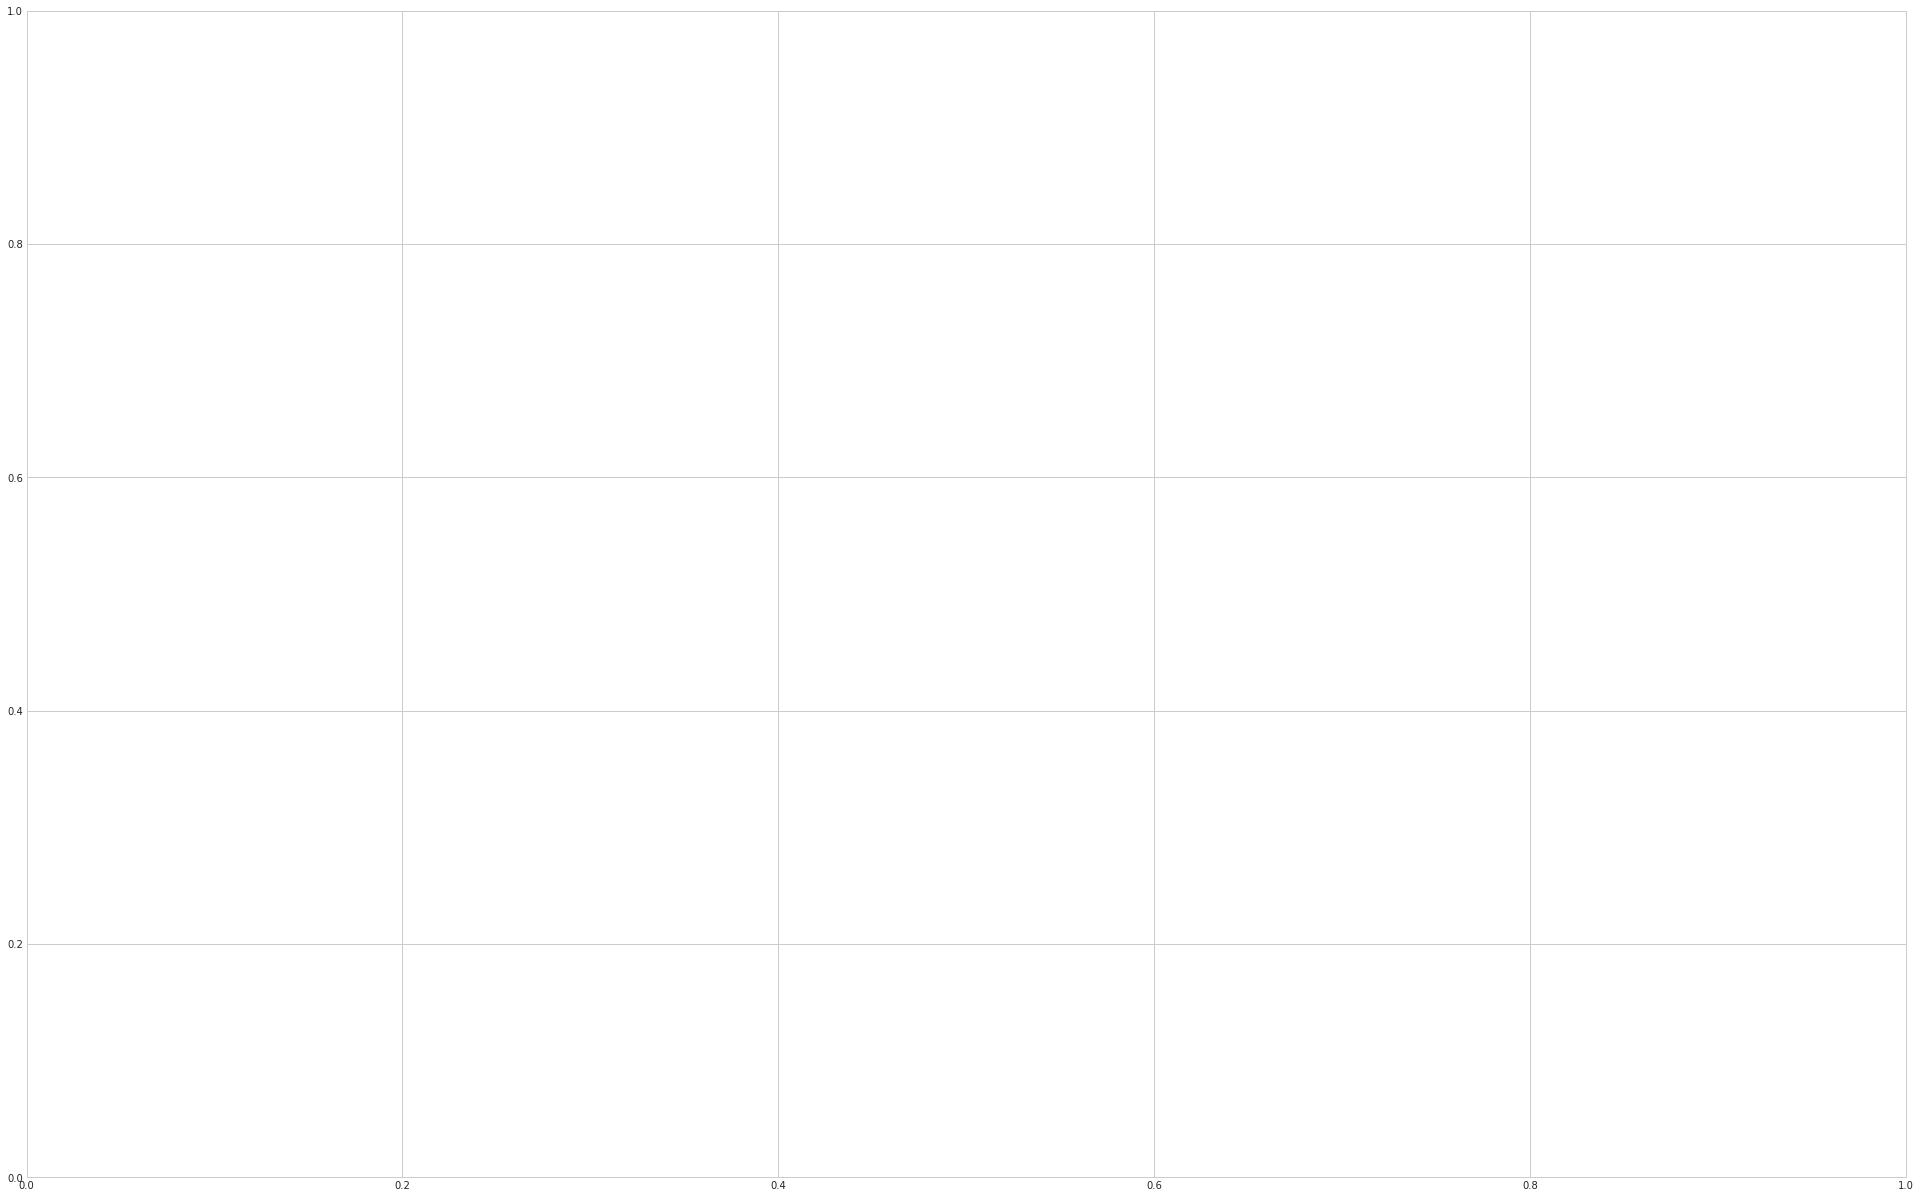

In [ ]:
## Plot fig sizing. 
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,20))
## Plotting heatmap. 

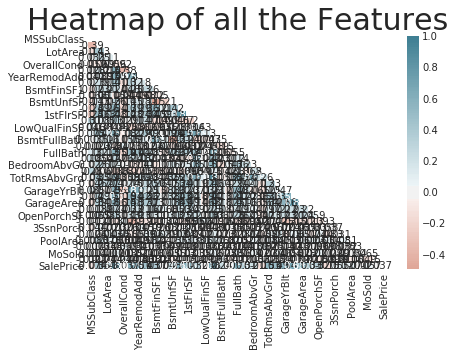

In [ ]:
# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(train.corr(), cmap=sns.diverging_palette(20, 220, n=200), mask = mask, annot=True, center = 0, );
## Give title. 
plt.title("Heatmap of all the Features", fontsize = 30);

In [ ]:
## Dropping the "Id" from train and test set. 
# train.drop(columns=['Id'],axis=1, inplace=True)

train.drop(columns=['Id'],axis=1, inplace=True)
test.drop(columns=['Id'],axis=1, inplace=True)

## Saving the target values in "y_train". 
y = train['SalePrice'].reset_index(drop=True)



# getting a copy of train
previous_train = train.copy()
## Combining train and test datasets together so that we can do all the work at once. 
all_data = pd.concat((train, test)).reset_index(drop = True)
## Dropping the target variable. 
all_data.drop(['SalePrice'], axis = 1, inplace = True)

## Dealing with Missing Values

* Missing data in train and test data(all_data)

* Imputing Missing Values


In [ ]:
## Some missing values are intentionally left blank, for example: In the Alley feature 
## there are blank values meaning that there are no alley's in that specific house. 
missing_val_col = ["Alley", 
                   "PoolQC", 
                   "MiscFeature",
                   "Fence",
                   "FireplaceQu",
                   "GarageType",
                   "GarageFinish",
                   "GarageQual",
                   "GarageCond",
                   'BsmtQual',
                   'BsmtCond',
                   'BsmtExposure',
                   'BsmtFinType1',
                   'BsmtFinType2',
                   'MasVnrType']

for i in missing_val_col:
    all_data[i] = all_data[i].fillna('None')

## These features are continous variable, we used "0" to replace the null values. 
missing_val_col2 = ['BsmtFinSF1',
                    'BsmtFinSF2',
                    'BsmtUnfSF',
                    'TotalBsmtSF',
                    'BsmtFullBath', 
                    'BsmtHalfBath', 
                    'GarageYrBlt',
                    'GarageArea',
                    'GarageCars',
                    'MasVnrArea']

for i in missing_val_col2:
    all_data[i] = all_data[i].fillna(0)

In [ ]:
## Replaced all missing values in LotFrontage by imputing the median value of each neighborhood. 
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform( lambda x: x.fillna(x.mean()))
## the "OverallCond" and "OverallQual" of the house. 
# all_data['OverallCond'] = all_data['OverallCond'].astype(str) 
# all_data['OverallQual'] = all_data['OverallQual'].astype(str)

## Zoning class are given in numerical; therefore converted to categorical variables. 
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)
all_data['MSZoning'] = all_data.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

## Important years and months that should be categorical variables not numerical. 
# all_data['YearBuilt'] = all_data['YearBuilt'].astype(str)
# all_data['YearRemodAdd'] = all_data['YearRemodAdd'].astype(str)
# all_data['GarageYrBlt'] = all_data['GarageYrBlt'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str) 
all_data['Functional'] = all_data['Functional'].fillna('Typ') 
all_data['Utilities'] = all_data['Utilities'].fillna('AllPub') 
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0]) 
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna("TA") 
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['Electrical'] = all_data['Electrical'].fillna("SBrkr") 
missing_percentage(all_data)

,Total,Percent


# So, there are no missing value left

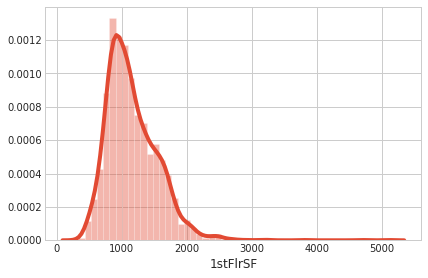

In [ ]:
sns.distplot(all_data['1stFlrSF']);

In [ ]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)

skewed_feats

MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.146143
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.931594
MasVnrArea        2.613592
OpenPorchSF       2.535114
WoodDeckSF        1.842433
1stFlrSF          1.469604
LotFrontage       1.460429
BsmtFinSF1        1.425230
GrLivArea         1.269358
TotalBsmtSF       1.156894
BsmtUnfSF         0.919339
2ndFlrSF          0.861675
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
HalfBath          0.694566
BsmtFullBath      0.624832
OverallCond       0.570312
BedroomAbvGr      0.326324
GarageArea        0.239257
OverallQual       0.197110
FullBath          0.167606
GarageCars       -0.219581
YearRemodAdd     -0.451020
YearBuilt        -0.599806
GarageYrBlt      -3.906205
dtype: float64

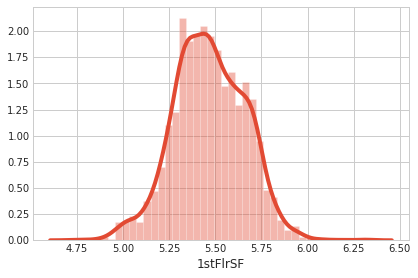

In [ ]:
## Fixing Skewed features using boxcox transformation. 

def fixing_skewness(df):
    """
    This function takes in a dataframe and return fixed skewed dataframe
    """
    ## Import necessary modules 
    from scipy.stats import skew
    from scipy.special import boxcox1p
    from scipy.stats import boxcox_normmax
    
    ## Getting all the data that are not of "object" type. 
    numeric_feats = df.dtypes[df.dtypes != "object"].index

    # Check the skew of all numerical features
    skewed_feats = df[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
    high_skew = skewed_feats[abs(skewed_feats) > 0.5]
    skewed_features = high_skew.index

    for feat in skewed_features:
        df[feat] = boxcox1p(df[feat], boxcox_normmax(df[feat] + 1))

fixing_skewness(all_data)
sns.distplot(all_data['1stFlrSF']);

In [ ]:
all_data = all_data.drop(['Utilities', 'Street', 'PoolQC',], axis=1)

# feture engineering a new feature "TotalFS"
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data['YrBltAndRemod']=all_data['YearBuilt']+all_data['YearRemodAdd']

all_data['Total_sqr_footage'] = (all_data['BsmtFinSF1'] + all_data['BsmtFinSF2'] +
                                 all_data['1stFlrSF'] + all_data['2ndFlrSF'])

all_data['Total_Bathrooms'] = (all_data['FullBath'] + (0.5 * all_data['HalfBath']) +
                               all_data['BsmtFullBath'] + (0.5 * all_data['BsmtHalfBath']))

all_data['Total_porch_sf'] = (all_data['OpenPorchSF'] + all_data['3SsnPorch'] +
                              all_data['EnclosedPorch'] + all_data['ScreenPorch'] +
                              all_data['WoodDeckSF'])
all_data['haspool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['has2ndfloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasgarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasbsmt'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasfireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
all_data.shape

(2919, 86)

## Creating Dummy Variables.

In [ ]:
## Creating dummy variable 
final_features = pd.get_dummies(all_data).reset_index(drop=True)
final_features.shape
(2917, 333)
X = final_features.iloc[:len(y), :]

X_sub = final_features.iloc[len(y):, :]
outliers = [30, 88, 462, 631, 1322]
X = X.drop(X.index[outliers])
y = y.drop(y.index[outliers])
def overfit_reducer(df):
    """
    This function takes in a dataframe and returns a list of features that are overfitted.
    """
    overfit = []
    for i in df.columns:
        counts = df[i].value_counts()
        zeros = counts.iloc[0]
        if zeros / len(df) * 100 > 99.94:
            overfit.append(i)
    overfit = list(overfit)
    return overfit


overfitted_features = overfit_reducer(X)

X = X.drop(overfitted_features, axis=1)
X_sub = X_sub.drop(overfitted_features, axis=1)
X.shape,y.shape, X_sub.shape

((1455, 333), (1455,), (1459, 333))

## Fitting model(simple approach)
## Train_test split


In [ ]:
## Train test s
from sklearn.model_selection import train_test_split
## Train test split follows this distinguished code pattern and helps creating train and test set to build machine learning. 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .33, random_state = 142)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((974, 333), (974,), (481, 333), (481,))

## Regularization Models

What makes regression model more effective is its ability of regularizing. The term "regularizing" stands for models ability to structurally prevent overfitting by imposing a penalty on the coefficients.

There are three types of regularizations.

•	Ridge

•	Lasso

•	Elastic Net


# Ridge:

Ridge regression adds penalty equivalent to the square of the magnitude of the coefficients. This penalty is added to the least square loss function above and looks like this...


In [ ]:
## Importing Ridge. 
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
## Assiging different sets of alpha values to explore which can be the best fit for the model. 
alpha_ridge = [-3,-2,-1,1e-15, 1e-10, 1e-8,1e-5,1e-4, 1e-3,1e-2,0.5,1,1.5, 2,3,4, 5, 10, 20, 30, 40]
temp_rss = {}
temp_mse = {}
for i in alpha_ridge:
    ## Assigin each model. 
    ridge = Ridge(alpha= i, normalize=True)
    ## fit the model. 
    ridge.fit(X_train, y_train)
    ## Predicting the target value based on "Test_x"
    y_pred = ridge.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rss = sum((y_pred-y_test)**2)
    temp_mse[i] = mse
    temp_rss[i] = rss
for key, value in sorted(temp_mse.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

0.5: 0.011522121141502839
1: 0.01192217920191781
1.5: 0.012733722249665028
2: 0.013688614634513851
0.01: 0.014931645374042839
3: 0.015774441596885194
0.001: 0.01590876579286577
0.0001: 0.016132000253727016
1e-05: 0.01617479982971922
1e-08: 0.016183222310961462
1e-10: 0.016183230145349895
1e-15: 0.016183231749702875
4: 0.017959834600795695
5: 0.020181825394967965
10: 0.031118917089351026
20: 0.0498495556994685
30: 0.06411551059888473
40: 0.07500373393670154
-2: 1.4349575286202811
-3: 1.8037399159042922
-1: 10.501818601783832


In [ ]:
for key, value in sorted(temp_rss.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

0.5: 5.542140269062868
1: 5.734568196122472
1.5: 6.124920402088876
2: 6.584223639201165
0.01: 7.1821214249146035
3: 7.587506408101782
0.001: 7.652116346368432
0.0001: 7.759492122042691
1e-05: 7.7800787180949404
1e-08: 7.784129931572461
1e-10: 7.784133699913304
1e-15: 7.784134471607086
4: 8.638680442982725
5: 9.707458014979597
10: 14.968199119977843
20: 23.977636291444355
30: 30.839560598063542
40: 36.07679602355342
-2: 690.2145712663552
-3: 867.598899549964
-1: 5051.374747458027


#Lasso:

Lasso adds penalty equivalent to the absolute value of the sum of coefficients. This penalty is added to the least square loss function and replaces the squared sum of coefficients from Ridge.


In [ ]:
from sklearn.linear_model import Lasso 
temp_rss = {}
temp_mse = {}
for i in alpha_ridge:
    ## Assigin each model. 
    lasso_reg = Lasso(alpha= i, normalize=True)
    ## fit the model. 
    lasso_reg.fit(X_train, y_train)
    ## Predicting the target value based on "Test_x"
    y_pred = lasso_reg.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rss = sum((y_pred-y_test)**2)
    temp_mse[i] = mse
    temp_rss[i] = rss
for key, value in sorted(temp_mse.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

0.0001: 0.010303118637167461
1e-05: 0.01368317132152249
1e-08: 0.016100530811427913
1e-10: 0.016106248778340725
1e-15: 0.01610632258311915
0.001: 0.017292349620527846
0.01: 0.13796697113133757
0.5: 0.14811391324811346
1: 0.14811391324811346
1.5: 0.14811391324811346
2: 0.14811391324811346
3: 0.14811391324811346
4: 0.14811391324811346
5: 0.14811391324811346
10: 0.14811391324811346
20: 0.14811391324811346
30: 0.14811391324811346
40: 0.14811391324811346
-1: 25485967970.74979
-2: 101943873605.06007
-3: 229373716902.95105


In [ ]:
for key, value in sorted(temp_rss.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

0.0001: 4.955800064477545
1e-05: 6.581605405652314
1e-08: 7.744355320296828
1e-10: 7.747105662381889
1e-15: 7.7471411624803075
0.001: 8.317620167473892
0.01: 66.36211311417334
0.5: 71.24279227234257
1: 71.24279227234257
1.5: 71.24279227234257
2: 71.24279227234257
3: 71.24279227234257
4: 71.24279227234257
5: 71.24279227234257
10: 71.24279227234257
20: 71.24279227234257
30: 71.24279227234257
40: 71.24279227234257
-1: 12258750593930.658
-2: 49035003204033.875
-3: 110328757830319.48


#Elastic Net:

Elastic Net is the combination of both Ridge and Lasso. It adds both the sum of squared coefficients and the absolute sum of the coefficients with the ordinary least square function. Let's look at the function.


In [ ]:
from sklearn.linear_model import ElasticNet
temp_rss = {}
temp_mse = {}
for i in alpha_ridge:
    ## Assigin each model. 
    lasso_reg = ElasticNet(alpha= i, normalize=True)
    ## fit the model. 
    lasso_reg.fit(X_train, y_train)
    ## Predicting the target value based on "Test_x"
    y_pred = lasso_reg.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rss = sum((y_pred-y_test)**2)
    temp_mse[i] = mse
    temp_rss[i] = rss
for key, value in sorted(temp_mse.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

0.0001: 0.010747806198223997
0.001: 0.012923242241187268
1e-05: 0.014250867960731266
1e-08: 0.01610218960649485
1e-10: 0.016106274990215413
1e-15: 0.016106322583381467
0.01: 0.0956744306857868
0.5: 0.14811391324811346
1: 0.14811391324811346
1.5: 0.14811391324811346
2: 0.14811391324811346
3: 0.14811391324811346
4: 0.14811391324811346
5: 0.14811391324811346
10: 0.14811391324811346
20: 0.14811391324811346
30: 0.14811391324811346
40: 0.14811391324811346
-3: 5.724683349590157
-2: 5.8094475600246795
-1: 6.0507136112168425


In [ ]:
for key, value in sorted(temp_rss.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

0.0001: 5.169694781345741
0.001: 6.216079518011076
1e-05: 6.854667489111741
1e-08: 7.745153200724025
1e-10: 7.747118270293615
1e-15: 7.747141162606488
0.01: 46.01940115986346
0.5: 71.24279227234257
1: 71.24279227234257
1.5: 71.24279227234257
2: 71.24279227234257
3: 71.24279227234257
4: 71.24279227234257
5: 71.24279227234257
10: 71.24279227234257
20: 71.24279227234257
30: 71.24279227234257
40: 71.24279227234257
-3: 2753.572691152866
-2: 2794.344276371869
-1: 2910.3932469952983


## Fitting model (Advanced approach)

In [ ]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]
ridge = make_pipeline(MinMaxScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))
lasso = make_pipeline(MinMaxScaler(), LassoCV(max_iter=1e7, alphas=alphas2, random_state=42, cv=kfolds))
elasticnet = make_pipeline(MinMaxScaler(), ElasticNetCV(max_iter=1e7, alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio))                                
svr = make_pipeline(MinMaxScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003,))

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =42)                             
lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )
xgboost = XGBRegressor(learning_rate=0.01,n_estimators=3460, objective ='reg:squarederror',
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                      nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, xgboost, lightgbm),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

In [ ]:
# score = cv_rmse(stack_gen)
score = cv_rmse(ridge)
print("Ridge: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(lasso)
print("LASSO: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(elasticnet)
print("elastic net: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(svr)
print("SVR: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(lightgbm)
print("lightgbm: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

# score = cv_rmse(gbr)
# print("gbr: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(xgboost)
print("xgboost: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )


Ridge: 0.1294 (0.0343)
 2020-03-12 21:36:00.437537
LASSO: 0.1195 (0.0388)
 2020-03-12 21:36:10.472469
elastic net: 0.1196 (0.0388)
 2020-03-12 21:36:54.771181
SVR: 0.1246 (0.0367)
 2020-03-12 21:37:05.805017
lightgbm: 0.1206 (0.0347)
 2020-03-12 21:37:23.602587
xgboost: 0.1197 (0.0353)
 2020-03-12 21:41:13.899077


In [ ]:
print('START Fit')

print('stack_gen')
stack_gen_model = stack_gen.fit(np.array(X), np.array(y))

print('elasticnet')
elastic_model_full_data = elasticnet.fit(X, y)

print('Lasso')
lasso_model_full_data = lasso.fit(X, y)

print('Ridge') 
ridge_model_full_data = ridge.fit(X, y)

print('Svr')
svr_model_full_data = svr.fit(X, y)

# print('GradientBoosting')
# gbr_model_full_data = gbr.fit(X, y)

print('xgboost')
xgb_model_full_data = xgboost.fit(X, y)

print('lightgbm')
lgb_model_full_data = lightgbm.fit(X, y)

START Fit
stack_gen
elasticnet
Lasso
Ridge
Svr
xgboost
lightgbm


## Blending Models:

In [ ]:
1.0 * elastic_model_full_data.predict(X)

def blend_models_predict(X):
    return ((0.1 * elastic_model_full_data.predict(X)) + \
            (0.05 * lasso_model_full_data.predict(X)) + \
            (0.2 * ridge_model_full_data.predict(X)) + \
            (0.1 * svr_model_full_data.predict(X)) + \
   #          (0.1 * gbr_model_full_data.predict(X)) + \
            (0.15 * xgb_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.3 * stack_gen_model.predict(np.array(X))))
    
print('RMSLE score on train data:')
print(rmsle(y, blend_models_predict(X)))

RMSLE score on train data:
0.07144590754245896


In [ ]:
submission = pd.read_csv("sample_submission.csv")
submission.iloc[:,1] = np.floor(np.expm1(blend_models_predict(X_sub)))
#Predict submission

## Submission:

In [ ]:
q1 = submission['SalePrice'].quantile(0.005)
q2 = submission['SalePrice'].quantile(0.995)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x > q1 else x*0.77)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x < q2 else x*1.1)
submission.to_csv("submission.csv", index=False)